In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scan, simulate_data

In [29]:
params = {
    'M':1,
    'N':20,
    'D':71,
    'T':1000,
    'seed':3,
    'SM_repetitions':5,
    'spikes_in_SM':20,
    'noise':5000
}



In [30]:
A_dense, A_sparse, B_dense, B_sparse, K_dense, K_sparse = simulate_data.generate_synthetic_data(params)
pattern_template, all_times, window_time, cluster_time, sequence_time, opt_cutoff = scan.scan_raster(A_sparse[1],A_sparse[0])
SM_acc, cc, _ = simulate_data.check_ground_truth(pattern_template, K_dense)
print(SM_acc)

5086 Windows
126 patterns found..... 99% 10.01 | opt_cutoff - 1.09 | most_detections - 3etections - 3
[0.08108108]plates... 99%


In [11]:
pattern_template

[]

In [31]:
import pandas as pd

In [41]:
df = pd.read_json(r'Oct10th-1motif-2-scan_stats.json')
df['SM_acc'] = df['SM_acc'].apply(lambda x: x[0])

In [42]:
df

,M,N,D,T,SM_repetitions,spikes_in_SM,noise,window_time,cluster_time,sequence_time,total_time,total_spikes,total_patterns,SM_acc
0,1,100,101,1000,2,16,2000,1.568478,4.203513,9.836995,16.240346,2032,127,0.592593
1,1,100,101,1000,2,16,2000,1.552200,4.989708,9.903505,17.029437,2032,137,0.615385
2,1,100,101,1000,2,16,2000,1.763861,4.231081,9.485412,16.038640,2032,132,0.470588
3,1,100,101,1000,2,16,2000,1.765907,4.194867,9.920519,16.481202,2032,138,0.666667
4,1,100,101,1000,2,16,2000,1.823613,4.180723,11.303530,18.104207,2032,148,0.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,100,201,1000,5,16,2000,3.609349,4.450965,22.742040,31.572828,2080,77,1.000000
96,1,100,201,1000,5,16,2000,3.776164,7.525229,19.360013,31.439469,2080,80,1.000000
97,1,100,201,1000,5,16,2000,3.718135,4.209964,19.668253,28.447770,2080,85,1.000000
98,1,100,201,1000,5,16,2000,3.729277,4.163857,20.453747,29.124433,2080,79,1.000000


In [43]:
grouped = df.groupby(['N', 'D', 'T', 'SM_repetitions', 'spikes_in_SM', 'noise'])

average_sm_acc = grouped['SM_acc'].mean()

In [44]:
average_sm_acc

N    D    T     SM_repetitions  spikes_in_SM  noise
100  11   1000  5               16            2000     1.000000
     51   1000  5               16            2000     1.000000
     101  1000  2               16            2000     0.572272
                3               16            2000     0.988235
                5               4             2000     0.360392
                                8             2000     0.977778
                                16            2000     1.000000
                                              3000     1.000000
                                              4000     0.412766
                                              5000     0.000000
                                              8000     0.000000
                                32            2000     1.000000
                                64            2000     1.000000
                8               16            2000     1.000000
                13              16            2000  

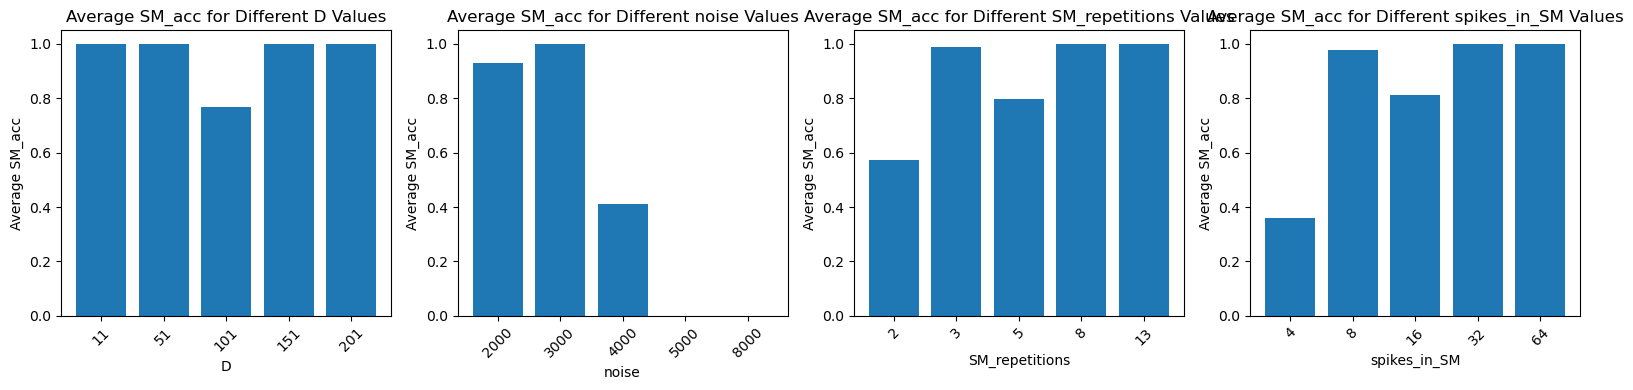

In [53]:
# Create a subplot with 4 bar charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust the figure size as needed

for i, parameter in enumerate(parameters):
    # Group by the current parameter and calculate the average 'SM_acc'
    grouped = df.groupby(parameter)['SM_acc'].mean().reset_index()

    ax = axes[i]
    ax.bar(grouped.index, grouped['SM_acc'])
    ax.set_xlabel(parameter)
    ax.set_ylabel('Average SM_acc')
    ax.set_title(f'Average SM_acc for Different {parameter} Values')
    ax.set_xticks(range(len(grouped)))
    ax.set_xticklabels(grouped[parameter])
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()

# Show the subplot with 4 bar charts
plt.show()